In [1]:
import pandas as pd

price_df = pd.read_csv(r"C:\Users\86183\Desktop\average_prices.csv")
senti_df = pd.read_csv(r"C:\Users\86183\Desktop\news_senti.csv")

price_df['Date'] = pd.to_datetime(price_df['Date'])
senti_df['Date'] = pd.to_datetime(senti_df['Date'])
merged_df = pd.merge(price_df, senti_df, on='Date', how='inner')

print(merged_df)

         Date     Average     Price     Senti
0  2024-01-04  451.876667  0.000000  0.000000
1  2024-01-05  452.282222  0.405556  0.000000
2  2024-01-08  451.347778 -0.934444  0.108440
3  2024-01-09  452.886000  1.538222  0.000000
4  2024-01-10  449.792222 -3.093778  0.124985
..        ...         ...       ...       ...
93 2024-05-29  556.060000  1.545000 -0.041383
94 2024-05-30  551.170000 -4.890000 -0.064730
95 2024-05-31  552.900000  1.730000 -0.045261
96 2024-06-03  550.075000 -2.825000 -0.002011
97 2024-06-04  553.190000  3.115000 -0.212764

[98 rows x 4 columns]


In [2]:
correlation = merged_df['Senti'].corr(merged_df['Price'])
print(f"Correlation between senti and price: {correlation}")

Correlation between senti and price: 0.0923507535105262


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8258
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.366
Time:                        01:58:37   Log-Likelihood:                -300.14
No. Observations:                  98   AIC:                             604.3
Df Residuals:                      96   BIC:                             609.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9835      0.532      1.848      0.0

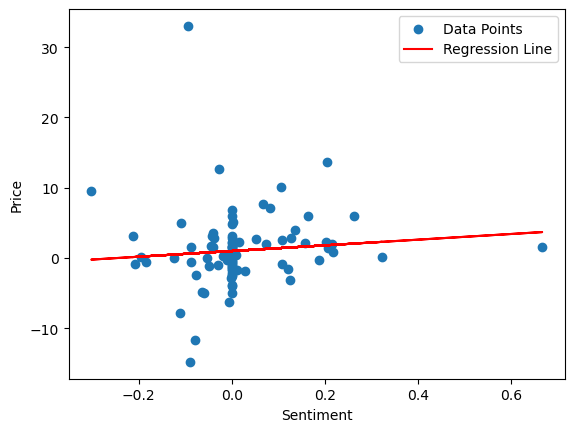

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
X = merged_df['Senti']
y = merged_df['Price']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())
plt.scatter(merged_df['Senti'], merged_df['Price'], label='Data Points')
plt.plot(merged_df['Senti'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.legend()